Ordering Points To Identify Clustering Structure (OPTICS) is a clustering algorithm that is an improvement of the DBSCAN algorithm. OPTICS can find clusters of varying density as well, which DBSCAN was not able to do due to fixed “eps”. 

Example 1

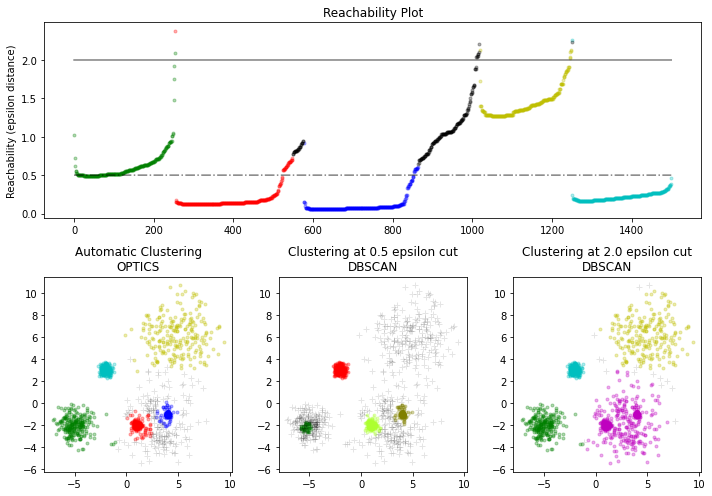

In [1]:
# Authors: Shane Grigsby <refuge@rocktalus.com>
#          Adrin Jalali <adrin.jalali@gmail.com>
# License: BSD 3 clause


from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data

np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)

# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=2)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()

Example 2

In [2]:
from sklearn.cluster import OPTICS
import numpy as np
X = np.array([[1, 2], [2, 5], [3, 6],
              [8, 7], [8, 8], [7, 3]])
clustering = OPTICS(min_samples=2).fit(X)
clustering.labels_

array([0, 0, 0, 1, 1, 1])

Example 3

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import gridspec 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 

In [5]:
X = pd.read_csv('/content/Mall_Customers.csv') 
  
# Dropping irrelevant columns 
drop_features = ['CustomerID', 'Gender'] 
X = X.drop(drop_features, axis = 1) 
  
# Handling the missing values if any 
X.fillna(method ='ffill', inplace = True) 
  
X.head() 

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that the data 
# approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Renaming the columns 
X_normalized.columns = X.columns 
  
X_normalized.head() 

,Age,Annual Income (k$),Spending Score (1-100)
0,-0.622173,-0.759499,-0.189897
1,-0.518894,-0.704396,0.484330
2,-0.488556,-0.614244,-0.619691
3,-0.495541,-0.740949,0.453247
4,-0.313049,-0.923896,-0.220036


In [7]:
# Building the OPTICS Clustering model 
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05) 
  
# Training the model 
optics_model.fit(X_normalized) 

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.05, min_samples=10, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [8]:
# Producing the labels according to the DBSCAN technique with eps = 0.5 
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 0.5) 
  
# Producing the labels according to the DBSCAN technique with eps = 2.0 
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 2) 
  
# Creating a numpy array with numbers at equal spaces till 
# the specified range 
space = np.arange(len(X_normalized)) 
  
# Storing the reachability distance of each point 
reachability = optics_model.reachability_[optics_model.ordering_] 
  
# Storing the cluster labels of each point 
labels = optics_model.labels_[optics_model.ordering_] 
  
print(labels) 

[-1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2  2  2
  2  2  2  2  2  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  3  3  3  3  3  3  3  3  3  3  3  3  3 -1 -1 -1 -1 -1  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5]


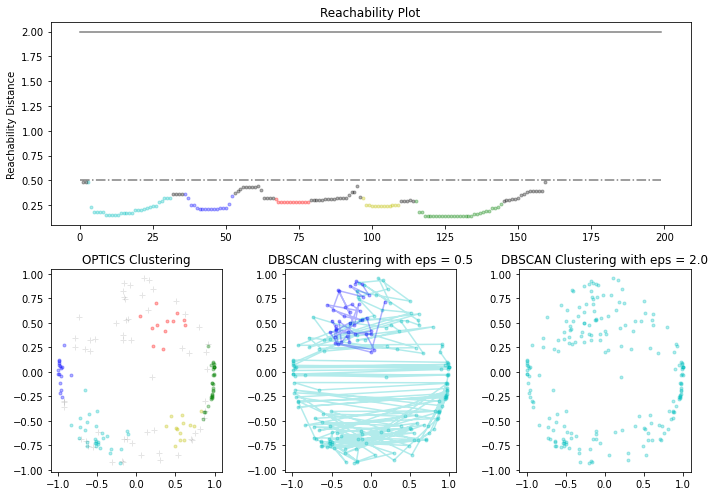

In [9]:
# Defining the framework of the visualization 
plt.figure(figsize =(10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2]) 
  
# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 
  
# Plotting the OPTICS Clustering 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = X_normalized[optics_model.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
      
ax2.plot(X_normalized.iloc[optics_model.labels_ == -1, 0], 
        X_normalized.iloc[optics_model.labels_ == -1, 1], 
       'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering') 
  
# Plotting the DBSCAN Clustering with eps = 0.5 
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = X_normalized[labels1 == Class] 
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.') 
        
ax3.plot(X_normalized.iloc[labels1 == -1, 0], 
        X_normalized.iloc[labels1 == -1, 1], 
       'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.5') 
  
# Plotting the DBSCAN Clustering with eps = 2.0 
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = X_normalized.iloc[labels2 == Class] 
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
          
ax4.plot(X_normalized.iloc[labels2 == -1, 0], 
        X_normalized.iloc[labels2 == -1, 1], 
       'k+', alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 2.0') 
  
  
plt.tight_layout() 
plt.show() 

Example 4

         X1        X2  ClusterID
0  6.424707 -5.383260          1
1 -3.514357 -8.923733          0
2  4.675701 -1.826950          1
3  6.981109 -5.590862          1
4 -0.883079 -9.152122          0
         X1        X2  ClusterID  PredictedClusterID
0  6.424707 -5.383260          1                   0
1 -3.514357 -8.923733          0                   1
2  4.675701 -1.826950          1                   0
3  6.981109 -5.590862          1                   0
4 -0.883079 -9.152122          0                   1


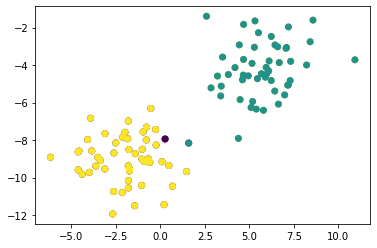

In [10]:
# Sample code to create OPTICS Clustering in Python
# Creating the sample data for clustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# create sample data for clustering
SampleData = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.5, random_state=40)

#create np array for data points
X = SampleData[0]
y = SampleData[1]

# Creating a Data Frame to represent the data with labels
ClusterData=pd.DataFrame(list(zip(X[:,0],X[:,1],y)), columns=['X1','X2','ClusterID'])
print(ClusterData.head())

# create scatter plot to visualize the data
%matplotlib inline
plt.scatter(ClusterData['X1'], ClusterData['X2'], c=ClusterData['ClusterID'])

##################################################################################
# This function is not present in python version 3.6
# Other option is pyclustering.cluster.optics but its not neat
from sklearn.cluster import OPTICS
op = OPTICS(min_samples=40, xi=0.02, min_cluster_size=0.1)

# Generating cluster id for each row using DBSCAN algorithm
ClusterData['PredictedClusterID']=op.fit_predict(X)
print(ClusterData.head())

# Plotting the predicted clusters
plt.scatter(ClusterData['X1'], ClusterData['X2'], c=ClusterData['PredictedClusterID'])

Example 5 **Anomaly Detection with OPTICS**

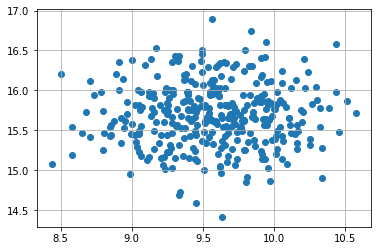

In [12]:
from sklearn.cluster import OPTICS
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt
random.seed(123)
x, _ = make_blobs(n_samples=350, centers=1, cluster_std=.4, center_box=(20, 5))

plt.scatter(x[:,0], x[:,1])
plt.grid(True)
plt.show() 

In [13]:
model = OPTICS().fit(x)
print(model)

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=None, min_samples=5, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)


We determine the scores of each sample of x data by using core_distance_ property of the model. thresh = quantile(scores, .98)
print(thresh) 

In [15]:
scores = model.core_distances_ 
thresh = quantile(scores, .98)
print(thresh) 

0.35064484877392416


By using threshold value, we'll find the samples with the scores that are equal to or higher than the threshold value.

In [16]:
index = where(scores >= thresh)
values = x[index]
print(values)

[[ 9.45071447 14.58847433]
 [ 8.500387   16.2113985 ]
 [ 9.56481939 16.89136015]
 [ 9.63176979 14.41548797]
 [ 8.43771706 15.07302741]
 [10.33672675 14.89789167]
 [10.43533425 16.58262441]]


We visualize the results in a plot by highlighting the anomalies with a color.

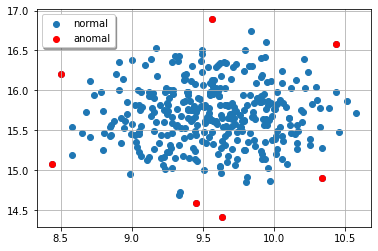

In [17]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.legend(("normal", "anomal"), loc="best", fancybox=True, shadow=True)
plt.grid(True)
plt.show()  